### Obxetivo
Relacionar a variación do número de poboación en Galicia cas taxas de paro, ocupación e actividade.

- Orixe dos datos das taxas por vía **web**: https://www.ige.gal/igebdt/selector.jsp?COD=6363
- Orixe dos datos do número de poboación en Galicia vía **CSV**: https://www.ige.gal/nutch/searchige.jsp?lang=gl&hitsPerSite=0&query=Cifras+poboacionais+de+referencia&x=0&y=0 
- Orixe dos datos dos datos de uso de tic: https://www.ine.es

### Mapa

Mostrarase a evolución do número de poboación nas 7 antigas rexións do Reino de Galicia:<br>
Esas 7 rexións represéntanse no escudo galego en forma de 7 cruces plateadas que rodean o cáliz.<br>
Estas son: **Santiago**, **Betanzos**, **Mondoñedo**, **Tui**, **Lugo**, **Ourense** y **A Coruña**.

### Diferencias importantes a ter en conta
1) A ***tasa de actividade*** é un indicador máis amplio que inclúe tanto as persoas que buscan traballo como as que están traballando.
2) A ***tasa de ocupación*** é un indicador máis específico que se centra únicamente nas persoas que teñen un traballo.


Script python transformación de edad da tabla das taxas

In [ ]:
import pandas as pd

def transformar_edad_taxas(frase):
  if frase == "de 16 a 24 anos":
    return "16-24"
  elif frase == "de 25 a 54 anos":
    return "25-54"
  elif frase == "de 55 e máis anos":
    return "55-69"
  else:
    return frase

dataset["idade_transformada"] = dataset["grupo_idade"].apply(transformar_edad_taxas)

Script python transformación de edad da tabla de número de poboación

In [ ]:
import pandas as pd

def transformar_edad_poboacion(frase):
  if frase in ["15-19", "20-24"]:
    return "16-24"
  elif frase in ["25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]:
    return "25-54"
  elif frase in ["55-59", "60-64", "65-69"]:
    return "55-69"
  else:
    return frase

dataset["idade_transformada"] = dataset["grupo_idade"].apply(transformar_edad_poboacion)

Script DAX para a variación de poboación en galicia o largo dos anos

In [ ]:
medida_diferenza_poboacion = VAR ano_anterior = SELECTEDVALUE('poboacion_galicia'[ano]) - 1
VAR poboacion_ano_anterior = CALCULATE(SUM('poboacion_galicia'[num_poboacion]), FILTER('poboacion_galicia', 'poboacion_galicia'[ano] = ano_anterior))
RETURN SUM('poboacion_galicia'[num_poboacion]) - poboacion_ano_anterior

In [ ]:
medida_diferenza_tasas = VAR ano_anterior = SELECTEDVALUE('taxas_galicia'[ano]) - 1
VAR taxas_ano_anterior = CALCULATE(SUM('taxas_galicia'[valor]), FILTER('taxas_galicia', 'taxas_galicia'[ano] = ano_anterior))
RETURN SUM('taxas_galicia'[valor]) - taxas_ano_anterior

Script DAX para a medida do mapa iteractivo

In [ ]:
cambio_num_poboacion = MAX('poboacion_7rexions'[num_poboacion]) - CALCULATE(MAX('poboacion_7rexions'[num_poboacion]), 'poboacion_7rexions'[ano] < YEAR(SELECTEDVALUE('poboacion_7rexions'[ano])))


# Orixe de datos con **python**

In [1]:
import pandas as pd

In [14]:
path_csv = "C:\\Users\\daniel.martinezcarre\\Desktop\\proyecto_powerbi\\habitantes_por_comarca.csv"
# Lectura de datos
poboacion_galicia = pd.read_csv(path_csv, encoding='unicode_escape')

# Transformación de datos
poboacion_galicia['Espazo'] = poboacion_galicia['Espazo'].apply(lambda x : x.split(' ',1)[1])
poboacion_galicia['Tempo'] = poboacion_galicia['Tempo'].apply(lambda x: x.split('/')[0])
poboacion_galicia['Cantidad'] = poboacion_galicia['DatoN'].apply(lambda x: int(x))
# Borrado de columnas innecesarias
poboacion_galicia = poboacion_galicia.drop('CodTempo', axis=1)
poboacion_galicia = poboacion_galicia.drop('DatoT', axis=1)
poboacion_galicia = poboacion_galicia.drop('DatoN', axis=1)
poboacion_galicia = poboacion_galicia.drop('Grupos de idade', axis=1)
poboacion_galicia = poboacion_galicia.drop('Sexo', axis=1)
poboacion_galicia = poboacion_galicia.drop('CodEspazo', axis=1)

poboacion_galicia

,Tempo,Espazo,Cantidad
0,2002,Arzúa,18790
1,2002,Barbanza,65523
2,2002,A Barcala,11391
3,2002,Bergantiños,69747
4,2002,Betanzos,38767
...,...,...,...
1373,2023,A Paradanta,12342
1374,2023,Pontevedra,125525
1375,2023,O Salnés,110220
1376,2023,Tabeirós-Terra de Montes,23187


In [15]:
poboacion_galicia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tempo     1378 non-null   object
 1   Espazo    1378 non-null   object
 2   Cantidad  1378 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 32.4+ KB


In [17]:
poboacion_galicia.sort_values(by='Cantidad', ascending=False)

,Tempo,Espazo,Cantidad
1377,2023,Vigo,427647
1324,2023,Vigo,426854
1271,2022,Vigo,426132
1112,2021,Vigo,426097
1218,2022,Vigo,425291
...,...,...,...
1309,2023,Terra de Caldelas,2785
1097,2021,Terra de Caldelas,2778
1362,2023,Terra de Caldelas,2770
1203,2022,Terra de Caldelas,2768


In [26]:
poboacion_max = poboacion_galicia[poboacion_galicia['Espazo'] == 'Vigo'].apply(lambda x: max(x))
poboacion_max

Tempo         2023
Espazo        Vigo
Cantidad    427647
dtype: object

## Código

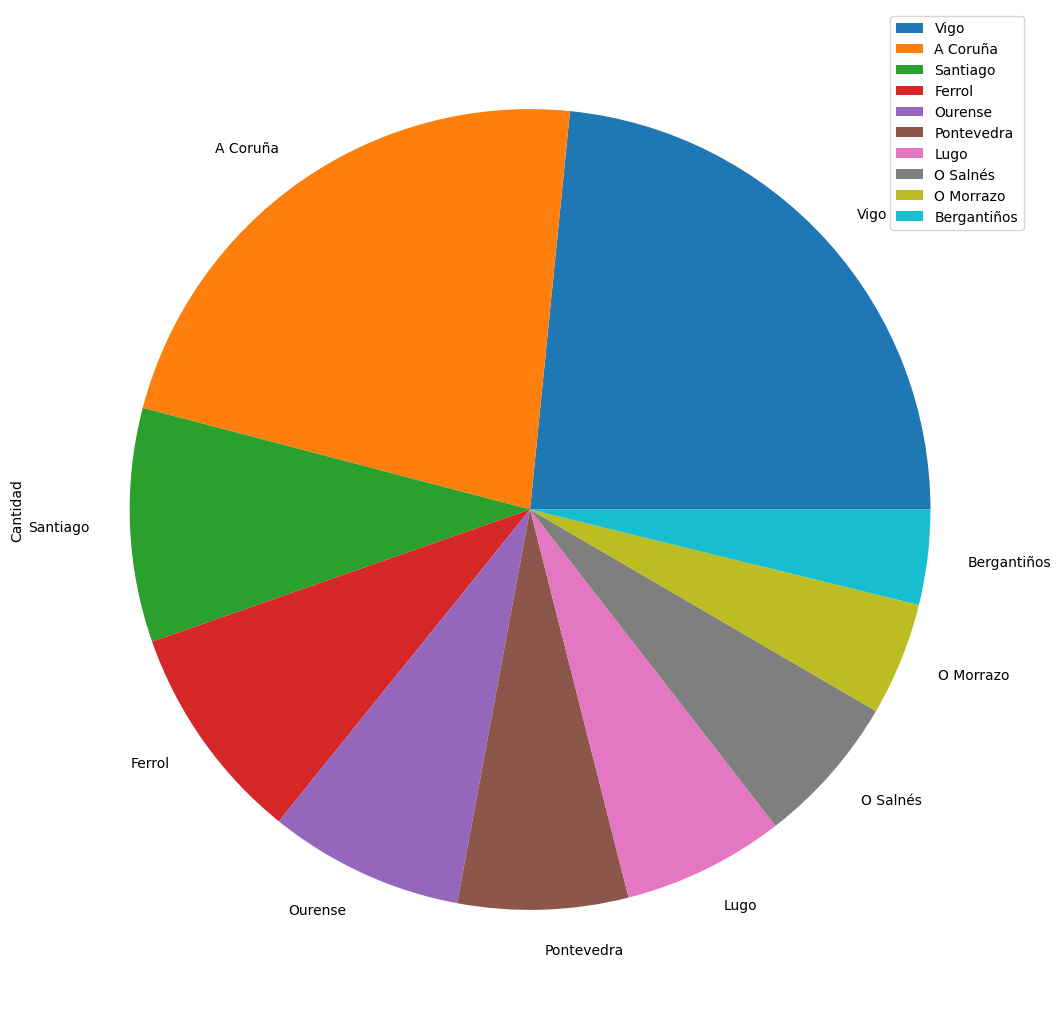

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

path_csv = "C:\\Users\\daniel.martinezcarre\\Desktop\\proyecto_powerbi\\habitantes_por_comarca.csv"

poboacion_galicia = pd.read_csv(path_csv, encoding='unicode_escape')

poboacion_galicia['Espazo'] = poboacion_galicia['Espazo'].apply(lambda x : x.split(' ',1)[1])
poboacion_galicia['Tempo'] = poboacion_galicia['Tempo'].apply(lambda x: x.split('/')[0])
poboacion_galicia['Cantidad'] = poboacion_galicia['DatoN'].apply(lambda x: int(x))

poboacion_galicia = poboacion_galicia.drop('CodTempo', axis=1)
poboacion_galicia = poboacion_galicia.drop('DatoT', axis=1)
poboacion_galicia = poboacion_galicia.drop('DatoN', axis=1)
poboacion_galicia = poboacion_galicia.drop('Grupos de idade', axis=1)
poboacion_galicia = poboacion_galicia.drop('Sexo', axis=1)
poboacion_galicia = poboacion_galicia.drop('CodEspazo', axis=1)

poboacion_grouped = poboacion_galicia.groupby('Espazo')

poboacion_max = poboacion_grouped['Cantidad'].max()

poboacion_max = poboacion_max.reset_index()

poboacion_max = poboacion_max.sort_values(by='Cantidad', ascending=False)

poboacion_max = poboacion_max.set_index('Espazo')

poboacion_max_top = poboacion_max[:10]

poboacion_max_top.plot.pie(y='Cantidad', figsize=(16, 13))
plt.show()